# Instituto Tecnológico de Las Américas (ITLA)

## Análisis Exploratorio de Datos

### Analítica de datos para finanzas

Sustentantes:
- Leandro Díaz (2023-0006)
- Laura Ramírez (2023-0132)

Prof.: **Gregory De la Rosa**

Fecha: *19/10/2024*

# Selección del activo

Escogimos el las acciones de TSLA porque

# Carga de datos

In [22]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = yf.download('TSLA', start='2020-01-01', end='2024-01-01')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


# Visualización de los datos

In [30]:
# Revisión de las columnas de los activos TSLA
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily Return',
       'Volatility'],
      dtype='object')

In [14]:
# Revisión de los índices
data.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [15]:
# Primeras filas
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [16]:
# Últimas filas
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400
2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900
2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300


In [11]:
# Revisión tipo de dato correspondiente y presencia de datos nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1006 non-null   float64
 1   High       1006 non-null   float64
 2   Low        1006 non-null   float64
 3   Close      1006 non-null   float64
 4   Adj Close  1006 non-null   float64
 5   Volume     1006 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.0 KB


In [17]:
data[data.duplicated]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


# Estadísticas descriptivas

In [18]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,209.199484,213.949515,204.067199,209.126371,209.126371,1.332191e+08
std,85.988785,87.686367,83.987942,85.797682,85.797682,8.862855e+07
min,24.980000,26.990667,23.367332,24.081333,24.081333,2.940180e+07
25%,159.702499,161.952496,153.649998,160.210003,160.210003,7.707188e+07
50%,223.954994,229.125000,218.174995,223.489998,223.489998,1.071037e+08
75%,263.557503,268.260010,258.307510,262.967491,262.967491,1.577770e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


# Visualización del precio histórico

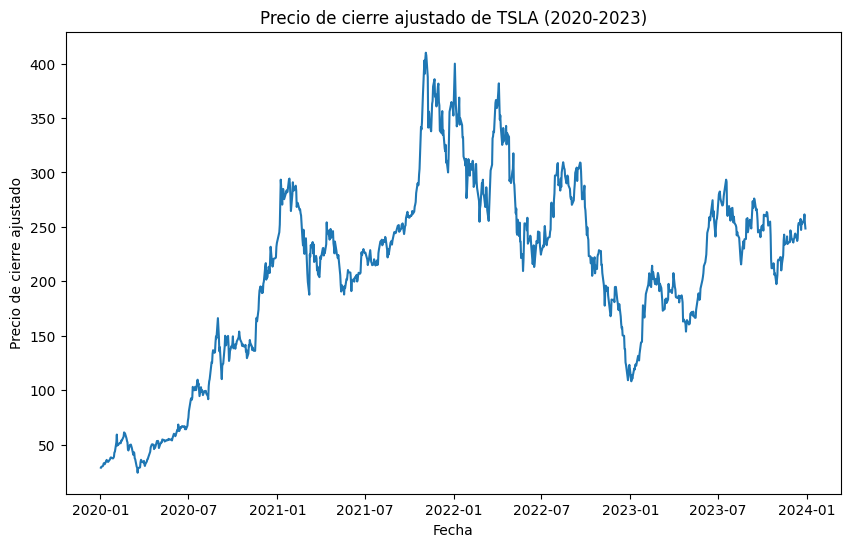

In [31]:
# Gráfico de línea precio de cierre ajustado
plt.figure(figsize=(10, 6))
plt.plot(data["Adj Close"])
plt.title("Precio de cierre ajustado de TSLA (2020-2023)")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre ajustado")
plt.show()

# Análisis de Volatilidad

In [24]:
# Cálculo de los rendimientos diarios del activo
data["Daily Return"] = data["Adj Close"].pct_change()

# Rápida revisión de los rendimientos diarios
data["Daily Return"].head()

Date
2020-01-02         NaN
2020-01-03    0.029633
2020-01-06    0.019255
2020-01-07    0.038801
2020-01-08    0.049205
Name: Daily Return, dtype: float64

In [25]:
data["Daily Return"].tail()

Date
2023-12-22   -0.007701
2023-12-26    0.016116
2023-12-27    0.018822
2023-12-28   -0.031594
2023-12-29   -0.018564
Name: Daily Return, dtype: float64

In [26]:
data["Daily Return"].describe()

count    1005.000000
mean        0.003070
std         0.042902
min        -0.210628
25%        -0.020062
50%         0.002170
75%         0.023880
max         0.198949
Name: Daily Return, dtype: float64

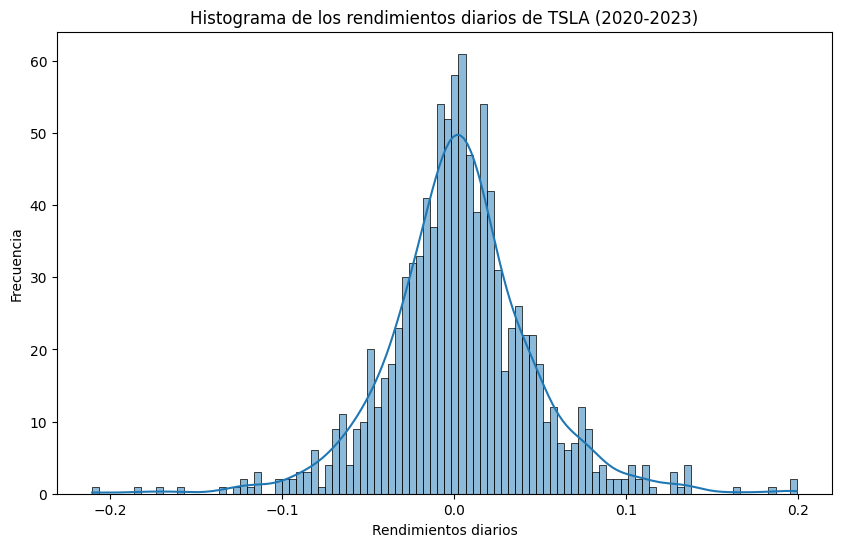

In [32]:
# Distribución de los rendimientos diarios (usando un histograma)
plt.figure(figsize=(10, 6))
sns.histplot(data["Daily Return"].dropna(), bins=100, kde=True)
plt.title("Histograma de los rendimientos diarios de TSLA (2020-2023)")
plt.xlabel("Rendimientos diarios")
plt.ylabel("Frecuencia")
plt.show()

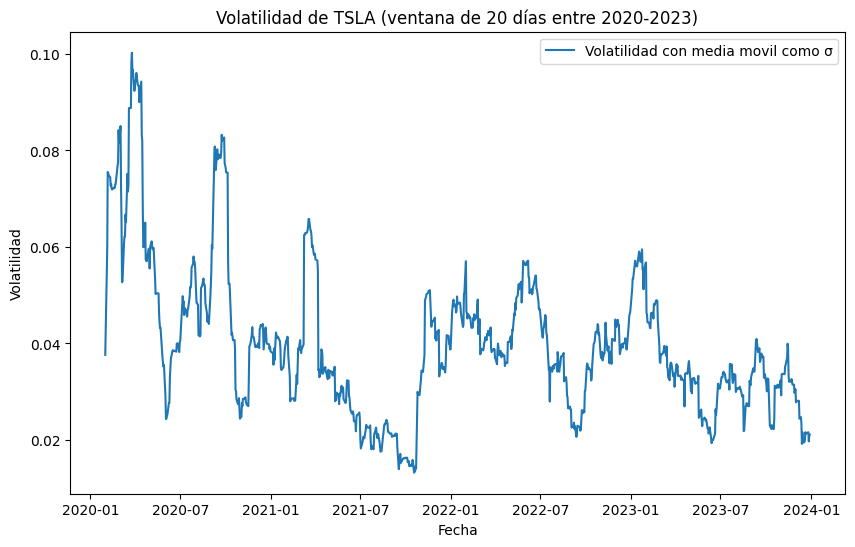

In [33]:
# Volatidad de los activos (ventana de 20 días)
data["Volatility"] = data["Daily Return"].rolling(window=20).std()

# Gráfico de línea de la volatilidad en una ventana de 20 días
plt.figure(figsize=(10, 6))
plt.plot(data["Volatility"], label="Volatilidad con media movil como σ")
plt.title("Volatilidad de TSLA (ventana de 20 días entre 2020-2023)")
plt.xlabel("Fecha")
plt.ylabel("Volatilidad")
plt.legend()
plt.show()

# Matríz de correlación

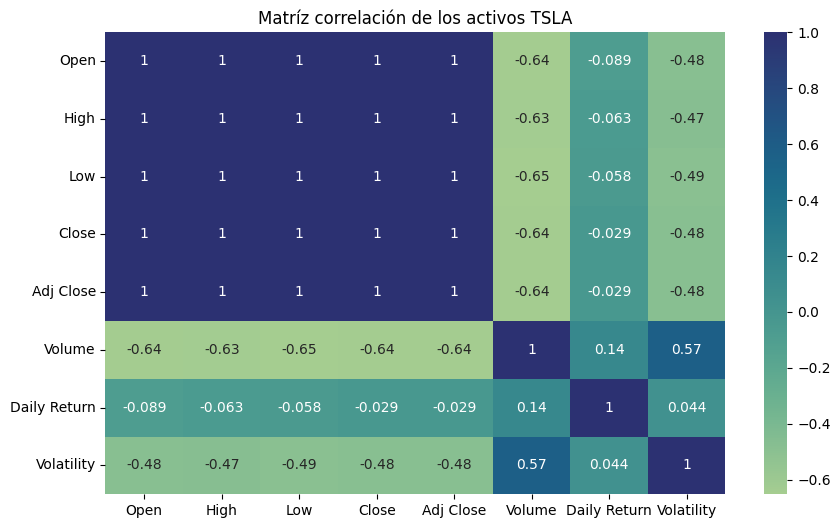

In [34]:
# Matrpiz de correlación de los activos TSLA
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="crest")
plt.title("Matríz correlación de los activos TSLA")
plt.show()

# Análisis de tendencias

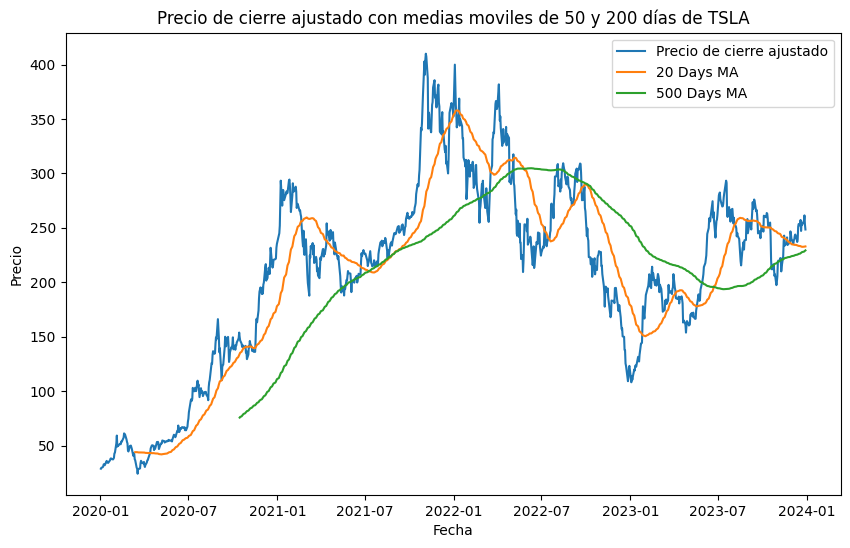

In [35]:
# Creación de variables de medias moviles (ventanas de 50 y 200 días)
data["50 Days MA"] = data["Adj Close"].rolling(window=50).mean()
data["200 Days MA"] = data["Adj Close"].rolling(window=200).mean()

# Gráfico de línea del precio de cierre ajustado junto con ambas medias moviles
plt.figure(figsize=(10, 6))
plt.plot(data[["Adj Close", "50 Days MA", "200 Days MA"]], label=["Precio de cierre ajustado", "20 Days MA", "500 Days MA"])
plt.title("Precio de cierre ajustado con medias moviles de 50 y 200 días de TSLA")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.show()

# Relación con el volumen